<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Нурлан!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>И снова здравствуй!</b>

Все правила оформления те же, обозначим номер итерации: v3
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Нурлан, приветствую!</b>

Все правила те же, номер итерации: v4
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет!</b>

Спасибо за усердие! Номер итерации: v5
    
</div>

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: тут не хватает описания: опиши суть проекта и какие задачи нужно решить</div>

### Шаг 1. Откройте файлы с данными

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_train = pd.read_csv('/datasets/hotel_train.csv')
hotel_test = pd.read_csv('/datasets/hotel_test.csv')
display(hotel_train.head(5))
display(hotel_test.head(5))

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте!</div>

### Шаг 2. Предобработка и исследовательский анализ данных

In [3]:
hotel_train.info()
hotel_test.info()
# пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [4]:
display(hotel_train.describe())
display(hotel_test.describe())

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


<AxesSubplot:>

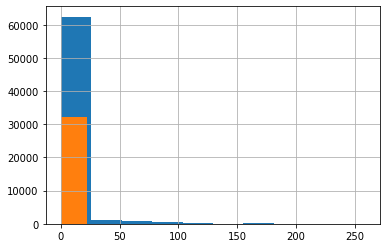

In [5]:
hotel_train['days_in_waiting_list'].hist()
hotel_test['days_in_waiting_list'].hist()

<AxesSubplot:>

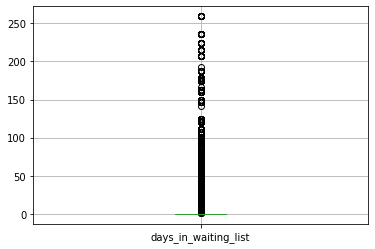

In [6]:
hotel_train.boxplot(column=['days_in_waiting_list'])

<AxesSubplot:>

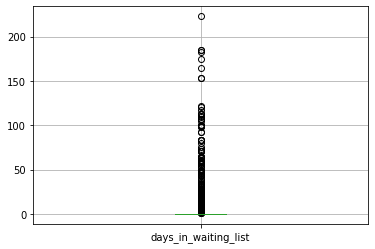

In [7]:
hotel_test.boxplot(column=['days_in_waiting_list'])

In [8]:
hotel_train.loc[hotel_train['babies'] > 5, 'babies']

22995    10.0
41528     9.0
Name: babies, dtype: float64

In [9]:
i = hotel_train.loc[hotel_train['babies'] > 5, 'babies'].index
hotel_train = hotel_train.drop(i)
len(hotel_train)

65227

In [10]:
hotel_train.loc[(hotel_train['babies'] > 0) & (hotel_train['adults'] < 1), 'babies']

22534    1.0
44049    1.0
52923    1.0
Name: babies, dtype: float64

In [11]:
i = hotel_train.loc[(hotel_train['babies'] > 0) & (hotel_train['adults'] < 1), 'babies'].index
hotel_train = hotel_train.drop(i)

In [12]:
hotel_test.loc[(hotel_test['babies'] > 0) & (hotel_test['adults'] < 1), 'children']

Series([], Name: children, dtype: float64)

In [13]:
hotel_train.loc[(hotel_train['children'] > 0) & (hotel_train['adults'] < 1), 'children']

17540    3.0
17598    2.0
17982    2.0
21556    2.0
22516    3.0
        ... 
64641    2.0
64751    3.0
64882    2.0
64892    2.0
64903    2.0
Name: children, Length: 148, dtype: float64

In [14]:
i = hotel_train.loc[(hotel_train['children'] > 0) & (hotel_train['adults'] < 1), 'children'].index
hotel_train = hotel_train.drop(i)
len(hotel_train)

65076

In [15]:
hotel_test.loc[(hotel_test['children'] > 0) & (hotel_test['adults'] < 1), 'children']

7743     2.0
7751     2.0
8772     2.0
9243     2.0
9305     2.0
        ... 
30601    2.0
30654    2.0
30678    2.0
30815    2.0
31418    3.0
Name: children, Length: 62, dtype: float64

In [16]:
i = hotel_test.loc[(hotel_test['children'] > 0) & (hotel_test['adults'] < 1), 'children'].index
hotel_test = hotel_test.drop(i)
len(hotel_test)

32350

In [17]:
hotel_train = hotel_train.drop('id',axis=1)
hotel_test = hotel_test.drop('id',axis=1)

In [18]:
display(hotel_test[hotel_test.duplicated(keep=False)])
display(hotel_train[hotel_train.duplicated(keep=False)])

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
1,1,62.0,2017,January,1,1,2,2,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4
2,1,62.0,2017,January,1,1,2,2,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4
33,1,113.0,2017,January,2,8,1,0,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,1
34,1,113.0,2017,January,2,8,1,0,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,1
58,1,40.0,2017,January,3,16,1,2,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32380,0,63.0,2017,August,35,31,0,3,3.0,0.0,...,0,0,0,D,0,0,Transient-Party,0,2,3
32381,0,63.0,2017,August,35,31,0,3,3.0,0.0,...,0,0,0,D,0,0,Transient-Party,0,2,3
32382,0,63.0,2017,August,35,31,0,3,3.0,0.0,...,0,0,0,D,0,0,Transient-Party,0,2,3
32398,0,175.0,2017,August,35,31,1,3,1.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
12,0,72.0,2015,July,27,1,2,4,2.0,0.0,...,0,0,0,A,1,0,Transient,0,1,6
13,0,72.0,2015,July,27,1,2,4,2.0,0.0,...,0,0,0,A,1,0,Transient,0,1,6
82,1,5.0,2015,July,28,5,1,0,2.0,0.0,...,0,0,0,D,0,0,Transient,0,0,1
85,1,5.0,2015,July,28,5,1,0,2.0,0.0,...,0,0,0,D,0,0,Transient,0,0,1
113,0,0.0,2015,July,28,7,0,1,1.0,0.0,...,0,0,0,A,0,0,Transient,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65189,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,5
65192,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,5
65193,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,1,5
65201,0,291.0,2016,December,53,28,2,4,2.0,0.0,...,0,0,0,A,2,0,Transient,0,2,6


In [19]:
hotel_train = hotel_train.drop_duplicates()
hotel_test = hotel_test.drop_duplicates()
print(len(hotel_train))
print(len(hotel_test))

43701
24637


Неявные дубликаты найдены и удалены. Нашлись аномальные значения в столбце babies и были удалены. Также были подозрения что, в столбце days_in_waiting_list тоже есть аномалии, но они не оправдались при визуализации. Также были найдены и удалены строки, где якобы дети и младенцы проживали без родителей, что является выбросом. 

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: в данных есть аномалии и выбросы: например, есть бронирования с 10 младенцами. Нужно внимательнее поизучать каждый признак на предмет некорректных значений и описать результаты в выводе. Также убедись в наличии выводов на каждом этапе </div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но стоит поизучать и другие аномалии: например, убедиться, что в данных нет бронирований с детьми без взрослых, так как детям номер сдать не могут. Также стоит проверить наличие дубликатов после удаления id</div>

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [20]:
hotel_train['reserved_room_type'] = hotel_train['reserved_room_type'].str.strip()
hotel_test['reserved_room_type'] = hotel_train['reserved_room_type'].str.strip()

In [21]:
encoder = OrdinalEncoder(handle_unknown='ignore')
encoder.fit(hotel_train)
hotel_train_oe = pd.DataFrame(encoder.transform(hotel_train), columns=hotel_train.columns)

hotel_test = hotel_test.dropna() # почему то откуда то появилась одна строка с NA значением, которой ранее не было, изза этого код падал
hotel_test_oe = pd.DataFrame(encoder.transform(hotel_test), columns=hotel_test.columns)
hotel_train_oe

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0.0,7.0,0.0,5.0,26.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,0.0,14.0,0.0,5.0,26.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
2,0.0,0.0,0.0,5.0,26.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0
3,0.0,9.0,0.0,5.0,26.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0
4,1.0,85.0,0.0,5.0,26.0,0.0,0.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43696,0.0,23.0,1.0,2.0,52.0,29.0,2.0,4.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,5.0
43697,0.0,53.0,1.0,2.0,52.0,30.0,2.0,3.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,3.0,4.0
43698,0.0,7.0,1.0,2.0,52.0,30.0,2.0,4.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,5.0
43699,0.0,17.0,1.0,2.0,52.0,29.0,2.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,6.0


<div class="alert alert-info">
    <b>Комментарий студента v3:</b> Порядковое кодирование обучено на обучающей выборке, и трансформировано на обучающей и тестовой выборке.
</div>

<div class="alert alert-warning" id="encoder">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: метод `fit_transform` — это короткая записть для последовательных вызовов `fit` и `transform`, то есть ты для каждой выборки по новой обучаешь OrdinalEncoder, вместо него нужно использовать метод `transform`</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v5<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: теперь все супер :)</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: тут код падает с ошибкой, перед следующей отправкой проверь работоспособность кода — это можно сделать, нажав на панели Jupiter Hub Kernel и Restart & Run All
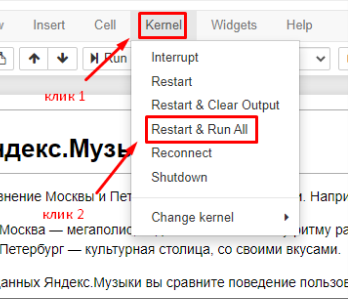</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что используешь порядковое кодирование в этом случае</div>

In [22]:
def calculate_profit(row):
    if row['is_canceled'] == 0:
        if row['reserved_room_type'] == 'A':
            return (row['total_nights'] * 1000) - (int((1 + row['total_nights'] / 2)) * 400)
        elif row['reserved_room_type'] == 'B':
            return (row['total_nights'] * 800) - (int((1 + row['total_nights'] / 2)) * 350)
        elif row['reserved_room_type'] == 'C':
            return (row['total_nights'] * 600) - (int((1 + row['total_nights'] / 2)) * 350)
        elif row['reserved_room_type'] == 'D':
            return (row['total_nights'] * 550) - (int((1 + row['total_nights'] / 2)) * 150)
        elif row['reserved_room_type'] == 'E':
            return (row['total_nights'] * 500) - (int((1 + row['total_nights'] / 2)) * 150)
        elif row['reserved_room_type'] == 'F':
            return (row['total_nights'] * 450) - (int((1 + row['total_nights'] / 2)) * 150)
        elif row['reserved_room_type'] == 'G':
            return (row['total_nights'] * 350) - (int((1 + row['total_nights'] / 2)) * 150)
        else:
            return 0
    else:
        return 0

def find_coef(row):
    if row['arrival_date_month'] in ['September', 'October', 'November']:
        return 0.2
    elif row['arrival_date_month'] in ['June', 'July', 'August']:
        return 0.4
    else:
        return 0

hotel_train['profit'] = hotel_train.apply(calculate_profit, axis=1)
hotel_train['coef'] = hotel_train.apply(find_coef, axis=1)
hotel_train['profit_coef'] = hotel_train['profit'] + (hotel_train['profit'] * hotel_train['coef'])

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: в задании есть фраза: «Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца». А отсюда мы узнаем два факта:

- затраты на обслуживание в случае, когда клиент заселился, нужно вычитать из суммарной стоимости за номер
- есть еще одна обязательная уборка перед заселением клиента

Чтобы рассчитать количество уборок для любого количества ночей можно использовать формулу `1 + nights // 2`. С учетом дополнительной уборки перед заселением, получается следующее:

    1 ночь, дополнительная уборка не требуется, 1 + 1 // 2 = 1
    2 ночи, убираться будут днем после первой ночи, 1 + 2 // 2 = 2
    3 ночи, убираться будут днем после первой ночи, 1 + 3 // 2 = 2
    4 ночи, убираться будут днем после первой ночи, днём после третьей ночи, 1 + 4 // 2 = 3 и т.д.</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Дополнительная уборка добавлена
</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: с количеством уборок все окей, но затраты на обслуживание должны вычитаться из суммарной стоимости за номер, нужно поправить</div>

<div class="alert alert-info">
    <b>Комментарий студента v2:</b> Как я понял нужно отнять затраты на уборки от стоимости проживания...
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, теперь прибыль рассчитывается корректно</div>

In [23]:
profit = hotel_train.loc[hotel_train['is_canceled'] == 0, 'profit_coef'].sum()
print(profit)

73584080.0


In [24]:
def calculate_loss(row):
    if row['is_canceled'] == 1:
        if row['reserved_room_type'] == 'A':
            return 1000 + (1000 * row['coef']) + 400
        elif row['reserved_room_type'] == 'B':
            return 800 + (800 * row['coef']) + 350
        elif row['reserved_room_type'] == 'C':
            return 600 + (600 * row['coef']) + 350
        elif row['reserved_room_type'] == 'D':
            return 550 + (550 * row['coef']) + 150
        elif row['reserved_room_type'] == 'E':
            return 500 + (500 * row['coef']) + 150
        elif row['reserved_room_type'] == 'F':
            return 450 + (450 * row['coef']) + 150
        elif row['reserved_room_type'] == 'G':
            return 350 + (350 * row['coef']) + 150
        else:
            return 0
    else:
        return 0
    
hotel_train['loss'] = hotel_train.apply(calculate_loss, axis=1)

In [25]:
hotel_train[['is_canceled','total_nights','reserved_room_type','arrival_date_month','profit','coef','profit_coef', 'loss']]

,is_canceled,total_nights,reserved_room_type,arrival_date_month,profit,coef,profit_coef,loss
0,0,1,A,July,600,0.4,840.0,0.0
1,0,2,A,July,1200,0.4,1680.0,0.0
2,0,2,C,July,500,0.4,700.0,0.0
3,0,2,C,July,500,0.4,700.0,0.0
4,1,3,A,July,0,0.4,0.0,1800.0
...,...,...,...,...,...,...,...,...
65224,0,6,D,December,2700,0.0,2700.0,0.0
65225,0,5,D,December,2300,0.0,2300.0,0.0
65226,0,6,D,December,2700,0.0,2700.0,0.0
65227,0,7,A,December,5400,0.0,5400.0,0.0


In [26]:
loss = hotel_train.loc[hotel_train['is_canceled'] == 1, 'loss'].sum()
print(loss)
print(profit - loss)

14714620.0
58869460.0


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не очень понятно, зачем ты вычитаешь 400000, ведь это стоимость внедрения модели, а самой модели пока нет :)</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Так как мы имеем дело с задачей классификации все категориальные признаки были перекодированы в числовые с помщью порядкового кодирования для того чтобы не угодить в дамми-ловушку. Также, в столбце reserved_room_type хранились лишние пробелы, которые мешали подсчету прибыли. Далее были посчитаны прибыль (прибыль с номера умноженная на коэффицент) - 91 597 300 рублей и убытки отеля - 34 726 540 рублей. Доход составил 56 870 760 рублей.

### Шаг 4. Разработка модели ML

Для оценки модели использована метрика - F1 score. Так как она учитывает как полноту (соотношение правильных позитивных значений (1) к правильным позитивным значениям и неправильным негативным значениям), так и точность (соотношение правильных позитивных значений (1) ко всем позитивным значениям).

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: перед обучением модели обязательно нужно выбрать основную метрику и аргументировать свой выбор, исходя из бизнес-задачи, это очень важная часть проекта</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, F1 в качестве основной метрики тоже подходит, но можно еще пояснить, почему нам важно учитывать и полноту, и точность для решения этой задачи</div>

<AxesSubplot:>

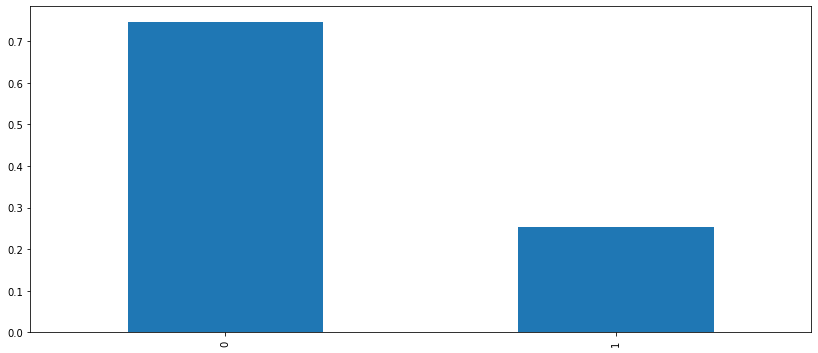

In [27]:
hotel_train['is_canceled'].value_counts(normalize=True).plot(kind='bar', figsize=(14, 6))

<div class="alert alert-info">
        <b>Комментарий студента v3:</b> Имеется небольшой дисбаланс классов.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: молодец, что отметил дисбаланс!</div>

In [28]:
param_grid = {
    'max_depth': [50, 100],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [7, 9, 11]
}


features = hotel_train_oe.drop(['is_canceled'], axis=1)
target = hotel_train_oe['is_canceled']

In [29]:
# Дерево решений
model = DecisionTreeClassifier(random_state=0,class_weight='balanced')
grid_search_dt = GridSearchCV(estimator=model,
                           param_grid=param_grid,  # parameters to be tuned
                           cv=5,
                           n_jobs=-1,  # -1 means use all available cores
                           verbose=2,
                           scoring='f1')


grid_search_dt.fit(features, target)

print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search_dt.best_score_, grid_search_dt.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END max_depth=50, min_samples_leaf=9, min_samples_split=2; total time=   0.2s
[CV] END max_depth=50, min

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: круто, что используешь GridSearchCV!</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: но GridSearchCV для выбора лучшей модели использует в качестве метрики ту, которая используется для метода score в самой модели. В случае DecisionTreeClassifier — это accuracy_score. Если ты хочешь использовать другую метрику, то ее можно указать с помощью параметра scoring, подробнее про это можно почитать в <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="blank_">документации</a>.</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [30]:
# Случайный лес
model = RandomForestClassifier(random_state=0,class_weight='balanced')

grid_search_rf = GridSearchCV(estimator=model,
                           param_grid=param_grid,  # parameters to be tuned
                           cv=5,
                           n_jobs=-1,  # -1 means use all available cores
                           verbose=2,
                           scoring='f1')


grid_search_rf.fit(features, target)

print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search_rf.best_score_, grid_search_rf.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   2.6s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   2.4s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   2.4s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   2.4s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=2; total time=   2.4s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   2.6s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   2.5s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   2.5s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   2.4s
[CV] END max_depth=50, min_samples_leaf=7, min_samples_split=6; total time=   2.5s
[CV] END max_depth=50, min_samples_leaf=9, min_samples_split=2; total time=   2.5s
[CV] END max_depth=50, min

In [31]:
# Логистическая регрессия
model = LogisticRegression(random_state=0,class_weight='balanced', solver='saga')

param_grid_logr = {
    'max_iter': [80, 100, 150],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}


grid_search_logr = GridSearchCV(estimator=model,
                           param_grid=param_grid_logr,  # parameters to be tuned
                           cv=5,
                           n_jobs=-1,  # -1 means use all available cores
                           verbose=2,
                           scoring='f1')


grid_search_logr.fit(features, target)

print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search_logr.best_score_, grid_search_logr.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................max_iter=80, penalty=l1; total time=   1.4s
[CV] END ............................max_iter=80, penalty=l1; total time=   1.5s
[CV] END ............................max_iter=80, penalty=l1; total time=   1.5s
[CV] END ............................max_iter=80, penalty=l1; total time=   1.5s
[CV] END ............................max_iter=80, penalty=l1; total time=   1.5s
[CV] END ............................max_iter=80, penalty=l2; total time=   1.2s
[CV] END ............................max_iter=80, penalty=l2; total time=   1.2s
[CV] END ............................max_iter=80, penalty=l2; total time=   1.2s
[CV] END ............................max_iter=80, penalty=l2; total time=   1.2s
[CV] END ............................max_iter=80, penalty=l2; total time=   1.2s
[CV] END ....................max_iter=80, penalty=elasticnet; total time=   0.1s
[CV] END ....................max_iter=80, penalt

In [32]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    f1 = f1_score(y_pred=predictions, y_true=test_labels)

    print('Model Performance')
    print('F1 = {:0.2f}%.'.format(f1))
    return [f1]

best_model = grid_search_logr.best_estimator_
f1 = evaluate(best_model, hotel_test_oe.drop('is_canceled', axis=1), hotel_test_oe['is_canceled'])

Model Performance
F1 = 0.53%.


<div class="alert alert-info">
        <b>Комментарий студента v4:</b> Логистическая регрессия показала результаты лучше на обучающей выборке (45% > 34%). Также, учтен небольшой дисбаланс классов с помощью параметра weight_class = 'balanced'. В результате модель улучшилась с 32% до 53%. Модель все еще можно улучшить если учесть больше гиперпараметров, но это требует дополнительного времени на калькуляцию.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что применил взвешивание классов для борьбы с дисбалансом!</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: R2 — это метрика для задачи регрессии, а мы решаем задачу бинарной классификации, так что стоит выбрать подходящую метрику</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: но ты можешь заметить, что твоя модель на тестовой выборке очень плохо справляется, а это может быть связано со следующим:
    
1. В данных остались выбросы, аномалии, дубликаты и лишние признаки, которые вносят шум и могут ухудшить качество модели, в том числе, привести к переобучению.
2. Ты обучаешь и трансформируешь OrdinalEncoder на каждой выборке отдельно. Тогда если в тестовой выборке в каком-то признаке будет меньше категорий, чем в обучающей, то закодированные значения в ней не будет совпадать со значениями на обучающей выборке, и признак начнет только путать модель. Поэтому правильнее обучать OrdinalEncoder только на обучающей выборке, а трансформировать уже обе.
3. Масштабирование данных может улучшить качество для линейных моделей, в том числе логистической регрессии

Попробуй поправить что-нибудь из этого списка, разобраться, что пошло не так, и улучшить качество на тестовой выборке</div>

<div class="alert alert-info">
    <b>Комментарий студента v3:</b> Нашел аномалии (дети бронирующие без родителей) и удалил. Также, пробовал удалить дубликаты не учитываяя признак id - в итоге метрика f-1 упала еще намного ниже, и вернул удаленные строки на место. Поправил Ordinal Encoding. Также, от себя учел дисбаланс классов.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что получилось избавиться от аномалий в данных. А удаление дубликатов, пусть даже неявных, не должно приводить к сильному падению метрики, скорее всего, дело в не совсем корректном кодировании с помощью OrdinalEncoder, оставил комментарий <a href="#encoder">выше</a></div>

In [33]:
prediction = pd.Series(best_model.predict(hotel_test_oe.drop('is_canceled', axis=1)))
hotel_test = hotel_test.merge(prediction.rename('prediction'), left_index=True, right_index=True)

In [34]:
hotel_test['profit'] = hotel_test.apply(calculate_profit, axis=1)
hotel_test['coef'] = hotel_test.apply(find_coef, axis=1)
hotel_test['profit_coef'] = hotel_test['profit'] + (hotel_test['profit'] * hotel_test['coef'])
hotel_test['loss'] = hotel_test.apply(calculate_loss, axis=1)

profit_true = hotel_test.loc[hotel_test['is_canceled'] == 0, 'profit_coef'].sum()
loss_true = hotel_test.loc[hotel_test['is_canceled'] == 1, 'loss'].sum()
print(profit_true - loss_true)

1763330.0


<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: здесь ты рассчитываешь прибыль на тестовой выборке до внедрения модели, а депозит мы сможем брать только после внедрения, поэтому тут нужно посчитать реальную прибыль, как и на прошлом шаге</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-danger" id="profit">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: для корректного расчета прибыли после внедрения модели нужно учитывать факт отмены брони и предсказания модели вместе, поэтому чтобы не запутаться, можно попробовать рассмотреть все возможные комбинации:

is_canceled = 0, predictions = 0 — постоялец заселился (profit > 0), модель предсказала, что он заселится. В этом случае прибыль отеля никак не меняется до и после внедрения модели.

is_canceled = 0, predictions = 1 — постоялец заселился (profit > 0), модель предсказала, что он отменит. В этом случае постоялец внесёт депозит, который пойдёт в счёт оплаты, то есть в этом случае прибыль отеля тоже никак не меняется.

is_canceled = 1, predictions = 0 — постоялец отменил бронь (profit < 0), модель предсказала, что он заселится, то есть депозит с такого клиента не брали. Тогда прибыль отеля тоже никак не меняется, отель просто потерял деньги, как и до внедрения модели.

is_canceled = 1, predictions = 1 — постоялец отменил бронь (profit < 0), модель предсказала, что он отменит, с постояльца взяли депозит в 80% от стоимости номера за одни сутки с учетом сезонного коэффициента и затрат на разовую уборку, отель потеряет только 20% от той суммы, которую терял без модели, так как остальное покроет депозит

А по твоей формуле в случае отмены отель уходит в плюс на сумму депозита, что не соответствует заданию, нужно поправить</div>

In [35]:
hotel_test['profit_pred'] = hotel_test.apply(calculate_profit, axis=1)
hotel_test['profit_coef_pred'] = hotel_test['profit_pred'] + (hotel_test['profit_pred'] * hotel_test['coef'])
hotel_test['deposit_pred'] = hotel_test.apply(calculate_loss, axis=1)

deposit_pred = hotel_test.loc[(hotel_test['prediction'] == 1), 'deposit_pred'].sum() * 0.2
no_deposit_pred = hotel_test.loc[(hotel_test['prediction'] != 1), 'deposit_pred'].sum()
profit_pred = hotel_test.loc[(hotel_test['is_canceled'] == 0), 'profit_pred'].sum()
print(profit_pred - deposit_pred - no_deposit_pred - 400000)

1877642.0


<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: тут тоже нужно разобраться:
1. Как и в прошлом случае, стоимость обслуживания нужно вычитать из стоимости за номер, а не прибавлять;
2. Ты сохраняешь новую прибыль в столбцах 'profit_pred' и 'deposit_pred', но никак их не используешь далее;
3. В случае отмены брони отель всегда уходит в минус, депозит покрывает только 80% убытков
    
Постарайся разобрать с расчетом прибыли в соответствии с заданием и моими комментариями выше
</div>

<div class="alert alert-info">
    <b>Комментарий студента v2:</b> Пункты 1 и 2 вроде как исправил. Насчет пункта # 3, как я понял нужно отнять оставшиеся 20% убытков от прибыли? 
</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: с 1 и 2 пунктами теперь все супер, но еще нужно доработать следующее:
1. Выручка до и после внедрения модели остается одинаковой, ведь внедрение модели не привлечет новых клиентов, а только минимизирует  убытки. Так что твоя функция `calculate_profit` должна остаться такой же, что и до внедрения модели, переопределять ее не нужно.
2. Ты правильно заметил, что если постоялец отменил бронь и модель это определила, достаточно умножить убытки на 0.2, чтобы посчитать количество убытков с учетом депозита. Но нужно еще учесть и тот случай, когда модель не определила отмену брони, то есть is_canceled = 1, prediction = 0. Тогда депозит с клиента не возьмут, а отель понесет убытки в полном объеме, как и до внедрения модели. А по твоей формуле этот случай учитывается, как будто постоялец заселился</div>

Были опробованы три модели - дерево решений, логистическая регрессия, и случайный лес. С помощью grid search cv была использована кросс валидация при которой наилучшая метрика F-1 была у логистической регрессии 45%. На тестовых данных точность модели составила 53% (прирост на 21% с прошлой попытки). Прибыль на тестовых данных составила 1.8 млн рублей. А на предсказанных с учетом депозита за отмену прибыли 1.9 млн рублей, что делает не целесообразным внедрение данной модели.

<div class="alert alert-danger">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: еще ближе к правде, но осталось поправить пару моментов:
1. При расчете `profit_pred1` и `profit_pred2` из-за опечатки у тебя вместо прибыли посчитается 0, нужно поправить;
2. В `no_deposit_pred` у тебя тоже посчитается 0, но это не верно, если бронь отменена и модель это не определила, то отель понесет убытки в полном объеме</div>

<div class="alert alert-warning" id="profit_example">
<h2>Комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: в твоей реализации переопределять `calculate_loss` тоже не нужно, ведь единственный случай, когда убытки меняются, ты рассчитываешь в переменной `deposit_pred`. Тогда тебе нужно удалить второе объявление функции `calculate_loss`, а код расчета прибыли после внедрения модели будет выглядеть примерно так:

    hotel_test['profit_pred'] = hotel_test.apply(calculate_profit, axis=1)
    hotel_test['profit_coef_pred'] = hotel_test['profit_pred'] + (hotel_test['profit_pred'] * hotel_test['coef'])
    hotel_test['deposit_pred'] = hotel_test.apply(calculate_loss, axis=1)

    deposit_pred = hotel_test.loc[(hotel_test['prediction'] == 1), 'deposit_pred'].sum() * 0.2
    no_deposit_pred = hotel_test.loc[(hotel_test['prediction'] != 1), 'deposit_pred'].sum()
    profit_pred = hotel_test.loc[(hotel_test['is_canceled'] == 0), 'profit_pred'].sum()
    print(profit_pred - deposit_pred - no_deposit_pred - 400000)

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v5<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: теперь все окей, только есть одна опечатка при расчете прибыли: в переменной `profit_pred` нужно использовать прибыль с учетом коэффициента(я тоже допустил эту опечатку в примере выше, прошу прощения). Тогда если посчитать чистую выгоду от внедрения модели, то получится больше 1 млн, то есть модель точно пригодится бизнесу</div>

In [54]:
#код ревьюера

profit_coef_pred = hotel_test.loc[(hotel_test['is_canceled'] == 0), 'profit_coef_pred'].sum()
final_profit = profit_true - loss_true
final_profit_with_pred = profit_coef_pred - deposit_pred - no_deposit_pred - 400000
print(final_profit_with_pred - final_profit)

1114032.0


### Шаг 5. Опишите портрет «ненадёжного» клиента

<AxesSubplot:>

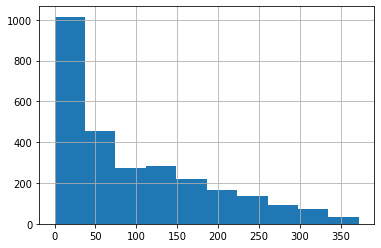

In [36]:
hotel_test.loc[hotel_test['prediction'] == 1, 'lead_time'].hist()

<AxesSubplot:>

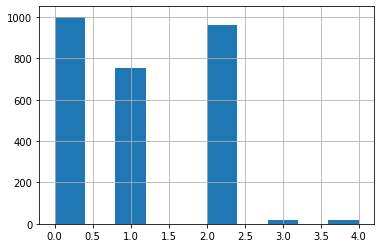

In [37]:
hotel_test.loc[hotel_test['prediction'] == 1, 'stays_in_weekend_nights'].hist()

<AxesSubplot:>

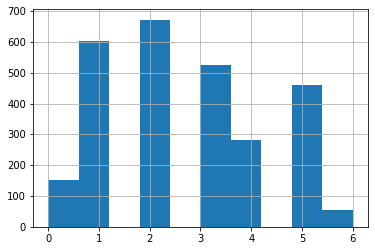

In [38]:
hotel_test.loc[hotel_test['prediction'] == 1, 'stays_in_week_nights'].hist()

<AxesSubplot:>

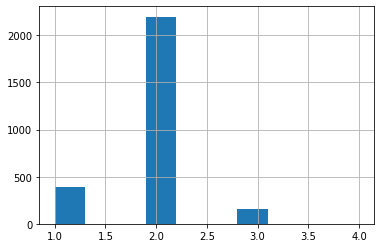

In [39]:
hotel_test.loc[hotel_test['prediction'] == 1, 'adults'].hist()

<AxesSubplot:>

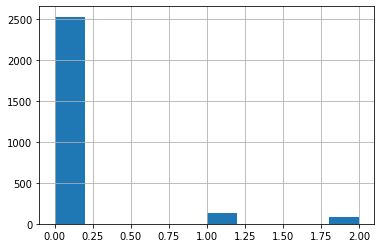

In [40]:
hotel_test.loc[hotel_test['prediction'] == 1, 'children'].hist()

<AxesSubplot:>

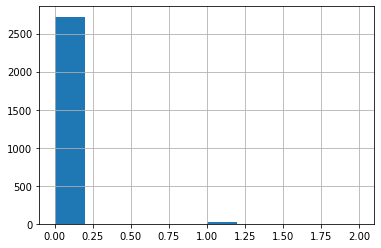

In [41]:
hotel_test.loc[hotel_test['prediction'] == 1, 'babies'].hist()

<AxesSubplot:>

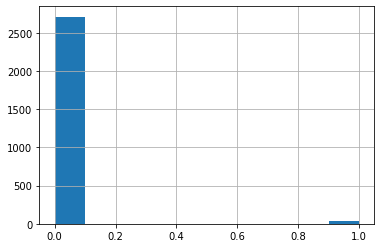

In [42]:
hotel_test.loc[hotel_test['prediction'] == 1, 'is_repeated_guest'].hist()

<AxesSubplot:>

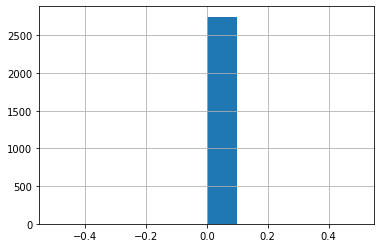

In [43]:
hotel_test.loc[hotel_test['prediction'] == 1, 'previous_cancellations'].hist()

<AxesSubplot:>

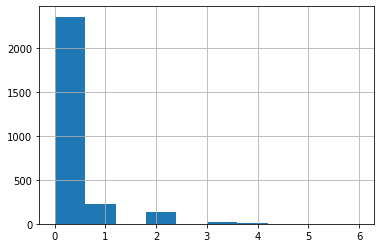

In [44]:
hotel_test.loc[hotel_test['prediction'] == 1, 'booking_changes'].hist()

<AxesSubplot:>

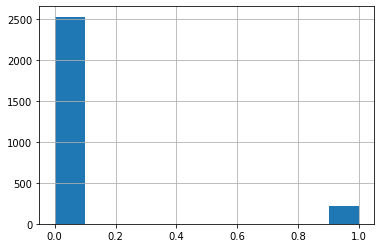

In [45]:
hotel_test.loc[hotel_test['prediction'] == 1, 'required_car_parking_spaces'].hist()

<AxesSubplot:>

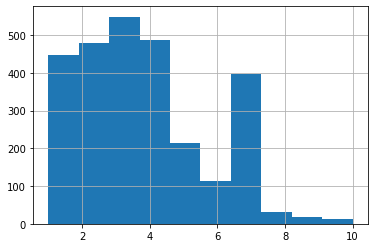

In [46]:
hotel_test.loc[hotel_test['prediction'] == 1, 'total_nights'].hist()

<AxesSubplot:>

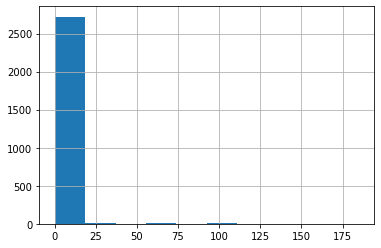

In [47]:
hotel_test.loc[hotel_test['prediction'] == 1, 'days_in_waiting_list'].hist()

<AxesSubplot:>

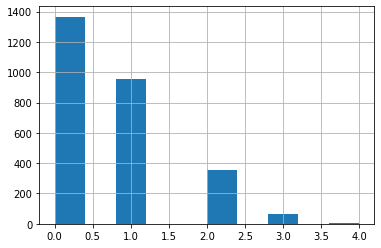

In [48]:
hotel_test.loc[hotel_test['prediction'] == 1, 'total_of_special_requests'].hist()

<AxesSubplot:>

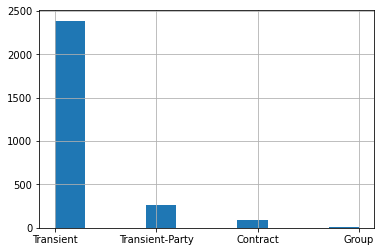

In [49]:
hotel_test.loc[hotel_test['prediction'] == 1, 'customer_type'].hist()

<AxesSubplot:>

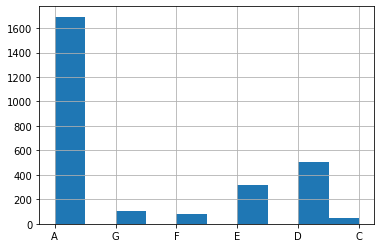

In [50]:
hotel_test.loc[hotel_test['prediction'] == 1, 'reserved_room_type'].hist()

<AxesSubplot:>

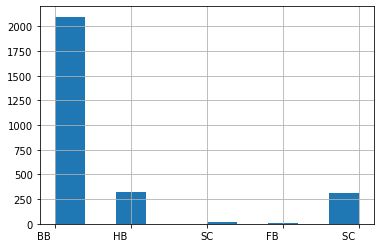

In [51]:
hotel_test.loc[hotel_test['prediction'] == 1, 'meal'].hist()

<AxesSubplot:>

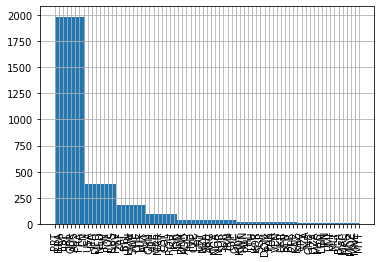

In [52]:
hotel_test.loc[hotel_test['prediction'] == 1, 'country'].hist(xrot=90)

<AxesSubplot:>

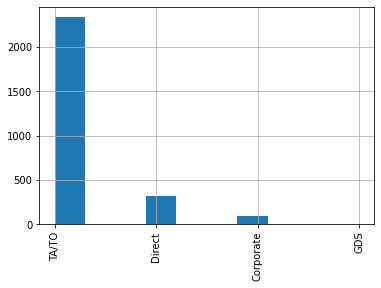

In [53]:
hotel_test.loc[hotel_test['prediction'] == 1, 'distribution_channel'].hist(xrot=90)

Признаки ненадежного клиента - бронирует за 200 часов до времени заселения 2 дня во время выходных или 1 будний день, обычно это пара взрослых без детей и малышей, которые ранее не заселялись в этот отель и не бронировали этот отель и не делали изменений в бронь, не просили парковочное место или специальные услуги, бронировали на 3 ночи и не ждали в листе ожидания. Клиент из категории "Transient", в основном бронировал самый дорогой номер, и питание "BB", из дистрибюционного канала TA/TO, из Португалии, США или Швеции. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, классный получился портрет :)</div>

### Шаг 6. Напишите общий вывод

Данные относительно чистые - нет пропусков или явных дубликтов. Неявные дуликаты удалены. Найдены аномалии в стобце babies, а также найдены случаи когда дети как будто бы проживали без родителей. Была гипотеза, что дни ожидания различаются в train и test, но она не подтвердилась. Столбец reserved_room_type содержал ненужные пробелы, которые мешали функции по подсчету прибыли. Также категориальные значения были перекодированы с помощью Ordinal Encoder, так как модели классификации не принимают на вход количественные данные. По train data чистый доход составил 57 млн рублей за вычетом потерь от отмененных бронирований. 3 модели были использованы для предсказаний - RandomForestClassifier, DecisionTreeClassifier, и LogisticRegression. Для того чтобы использовать кросс валидацию для классификации был использован CV grid search (не было показано как использовать кросс валидацию для классификации во время лекций, спасибо Гуглу). Наилучший результат показала логистическая регрессия с результатом 0.53% f-1 меры. Прибыль на тестовых данных составила 1.8 млн рублей, тогда как на предсказанных данных 1.9 млн рублей, что окупает бюджет на создание модели, но делает внедрение этой модели нецелесообразным.

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v5<a class="tocSkip"></a></h2>

Теперь то, что нужно, молодец!

Все критичные замечания исправлены, и теперь я могу принять твой проект.

<b>Успехов в обучении!</b>
        
</div>

<div class="alert alert-info">
    <b>Комментарий студента v3:</b> Модель все еще можно улучшить если провести более тщательный тюнинг гиперпараметров на мощном компьютере, так как модификация CV фолдов требует ОЧЕНЬ, ОЧЕНЬ, и ОЧЕНЬ большого количества времени для калькуляции. У меня на это в сумме ушло около 20 часов. И считаю, что идея сборного проекта с задачей классфикации была неверной, лучше было бы поставить задачу регрессии, где можно применить cross_val_score как на лекции. Если помимо низкого показателя f-1 метрики на тестовой выборке других критических замечаний нет, то прошу принять проект, так как я на его подготовку уже потратил около 40 часов, вместо оцениваемых Практикумом 25 часов.
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v4<a class="tocSkip"></a></h2>
    
Почти то, что нужно, но к сожалению, проект пока я принять не могу, так как обязательно нужно доразобраться с расчетом прибыли после внедрения модели: в реальных задачах часто приходится сталкиваться именно с решением бизнес-задач, так что очень важно потренироваться сделать это сейчас. Я постарался привести пример, как это можно реализовать <a href="#profit_example">выше</a>

По поводу долгого тюнинга: обучение моделей и правда может занимать много времени, но как я вижу, дольше всего у тебя обучается логистическая регрессия, а тогда скорее всего, это происходит из-за выбранного тобой solver, попробуй вместо него использовать `liblinear` или `saga`, модель должна обучиться заметно быстрее.
    
А метод cross_val_score универсальный, его можно применять и для задач классификации. Тогда например, с учетом рекомендации выше, код подбора гиперпараметров без GridSearch в этом проекте будет выглядеть примерно так:
    

    
    for max_iter in [80, 100, 150]:
        for penalty in ['l1', 'l2']: # остальные значения penalty не подходят для этого solver
            model = LogisticRegression(
                random_state=0,
                class_weight='balanced',
                solver='liblinear',
                max_iter=max_iter,
                penalty=penalty
            )
            scores = cross_val_score(model, features, target, cv=5, scoring='f1')
            print('max_iter: {}, penalty: {}, F1: {}'.format(max_iter, penalty, scores.mean()))
    
Если ничего из этого не поможет ускорить обучение модели, то можешь закомментировать код с подбором гиперпараметром и посчитать метрики с помощью cross_val_score на модели с уже подобранными гиперпараметрами на предыдущих итерациях. Также было бы здорово, если бы ты поправил кодирование с помощью OrdinalEncoder, оставлял комментарий <a href="#encoder">выше</a>: скорее всего, этого уже будет достаточно, чтобы модель начала показывать приемлимое качество на тестовой выборке

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Видно, что ты приложил много усилий, спасибо за проект!

Но тебе обязательно нужно обратить внимание на следующее:
* убедись в наличии выводов на каждом этапе: это обязательная часть любого проекта, без этого я не смогу его принять;
* доработай исследовательский анализ: стоит внимательнее изучить данные на наличие выбросов, дубликатов и некорректных значений, а также стоит проверить, какие именно признаки из тех, что у нас есть, стоит использовать далее;
* поправь расчет прибыли до и после внедрения модели;
* выбери метрику и аргументируй свой выбор: подходящих метрик тут может быть несколько, но по сути основная задача с точки зрения ML — это минимизировать количество ложноотрицательных ответов. Но если разобраться, то и бизнес-метрика вполне может быть основной метрикой для оценки моделей, здорово, если у тебя получится это реализовать;

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Уже заметно лучше, молодец!

Осталось доразобраться с расчетом прибыли до и после внедрения модели, а также убедиться, что весь код полностью запускается в окружении Практикума, без этого я не смогу принять твой проект.

Не стесняйся задавать вопросы, если что-то непонятно

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v3<a class="tocSkip"></a></h2>

Супер, теперь весь проект запускается, а прибыль до внедрения модели рассчитывается верно :)
    
Но еще нужно поправить расчет прибыли после внедрения модели и качество модели на тестовой выборке

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>